In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.applications import DenseNet121

In [15]:
# Model Definition
model = Sequential()

base_model = DenseNet121(include_top=False, input_shape=(128, 128, 3), pooling='avg')
model.add(base_model)

model.add(Dense(4, activation='softmax'))  # Assuming 4 classes (MildDemented, ModerateDemented, NonDemented, VeryMildDemented)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
training_set = train_datagen.flow_from_directory('D:\FMRI Images\OriginalDataset',
                                                 target_size=(128, 128),
                                                 batch_size=7,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(r'D:\\test model\\AugmentedAlzheimerDataset',
                                            target_size=(128, 128),
                                            batch_size=7,
                                            class_mode='categorical')


Found 6400 images belonging to 4 classes.
Found 281 images belonging to 4 classes.


In [20]:
history=model.fit(training_set,
          steps_per_epoch=22,
          epochs=25,
          validation_data=test_set,
          validation_steps=10)

# Cell 6: Visualizing Training Results
plt.figure(figsize=(12, 4))

Epoch 1/25
22/22 [==============================] - 7s 334ms/step - loss: 1.1171 - accuracy: 0.5260 - val_loss: 16.8209 - val_accuracy: 0.2429
Epoch 2/25
22/22 [==============================] - 7s 334ms/step - loss: 1.0356 - accuracy: 0.4610 - val_loss: 6.8327 - val_accuracy: 0.2143
Epoch 3/25
22/22 [==============================] - 9s 391ms/step - loss: 0.9435 - accuracy: 0.5714 - val_loss: 5.5466 - val_accuracy: 0.2571
Epoch 4/25
22/22 [==============================] - 8s 382ms/step - loss: 0.9281 - accuracy: 0.5195 - val_loss: 8.1399 - val_accuracy: 0.2571
Epoch 5/25
22/22 [==============================] - 9s 404ms/step - loss: 0.9516 - accuracy: 0.5584 - val_loss: 4.6202 - val_accuracy: 0.2714
Epoch 6/25
22/22 [==============================] - 9s 412ms/step - loss: 0.9611 - accuracy: 0.5065 - val_loss: 10.3278 - val_accuracy: 0.2857
Epoch 7/25
22/22 [==============================] - 9s 383ms/step - loss: 1.1109 - accuracy: 0.4870 - val_loss: 11.8322 - val_accuracy: 0.3000
Epo

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

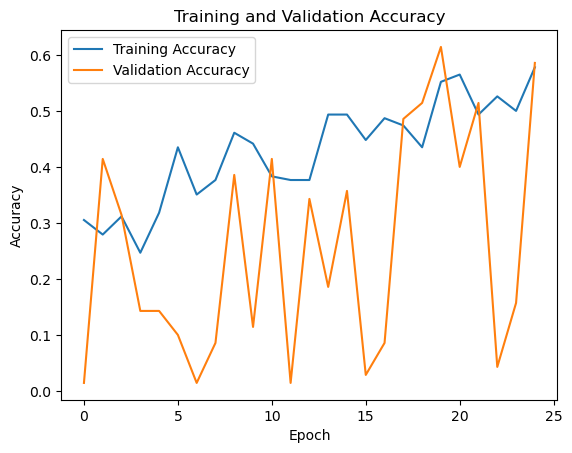

In [16]:
# Plot Training & Validation Accuracy values
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

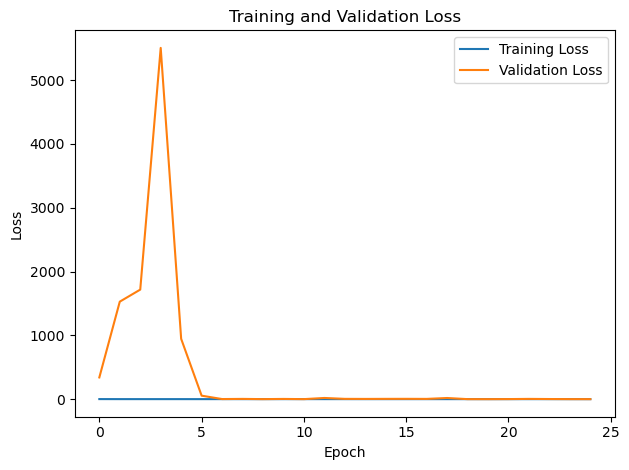

In [17]:
# Plot Training & Validation Loss values
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Cell 7: Additional Metrics
# Evaluate the model on the test set
test_metrics = model.evaluate(test_set, steps=10)
print(f'Test Loss: {test_metrics[0]}')
print(f'Test Accuracy: {test_metrics[1]}')

10/10 [==============================] - 1s 92ms/step - loss: 1.3793 - accuracy: 0.5000
Test Loss: 1.3793487548828125
Test Accuracy: 0.5


In [10]:
# Cell 8: Model Predictions
# Predictions on test set
y_true = test_set.classes
y_pred = model.predict(test_set, steps=len(test_set), verbose=0)

# Convert one-hot encoded labels to integers
y_true_int = y_true
y_pred_int = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true_int, y_pred_int))

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.25      0.18       896
           1       0.01      0.70      0.02        64
           2       0.48      0.07      0.13      3200
           3       0.00      0.00      0.00      2240

    accuracy                           0.08      6400
   macro avg       0.16      0.26      0.08      6400
weighted avg       0.26      0.08      0.09      6400



C:\Users\Arjun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arjun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arjun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


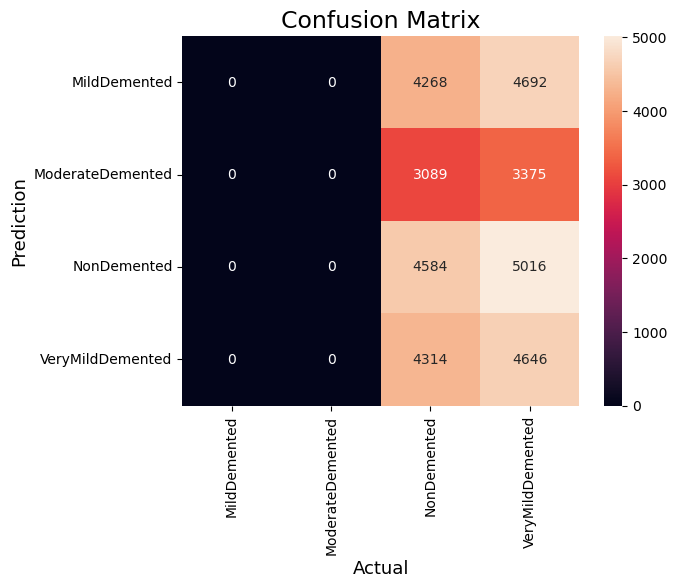

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_int, y_pred_int)
sns.heatmap(conf_matrix,annot=True,fmt='g',xticklabels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'],yticklabels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

AUC-ROC Class 0: 0.5
AUC-ROC Class 1: 0.5
AUC-ROC Class 2: 0.49943323490813646
AUC-ROC Class 3: 0.4978543455425649


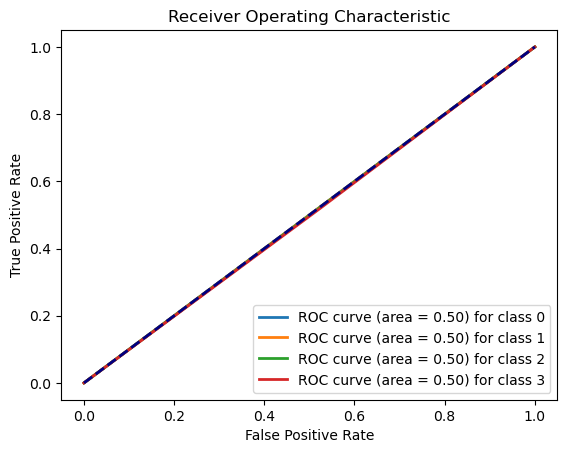

In [13]:
from sklearn.preprocessing import label_binarize
# One-hot encoding
y_true_one_hot = label_binarize(y_true_int, classes=[0, 1, 2, 3])
y_pred_one_hot = label_binarize(y_pred_int, classes=[0, 1, 2, 3])
# ROC-AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(4):  # assuming you have 4 classes
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print AUC-ROC for each class
for i in range(4):
    print(f"AUC-ROC Class {i}: {roc_auc[i]}")

# Plot ROC curve
plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


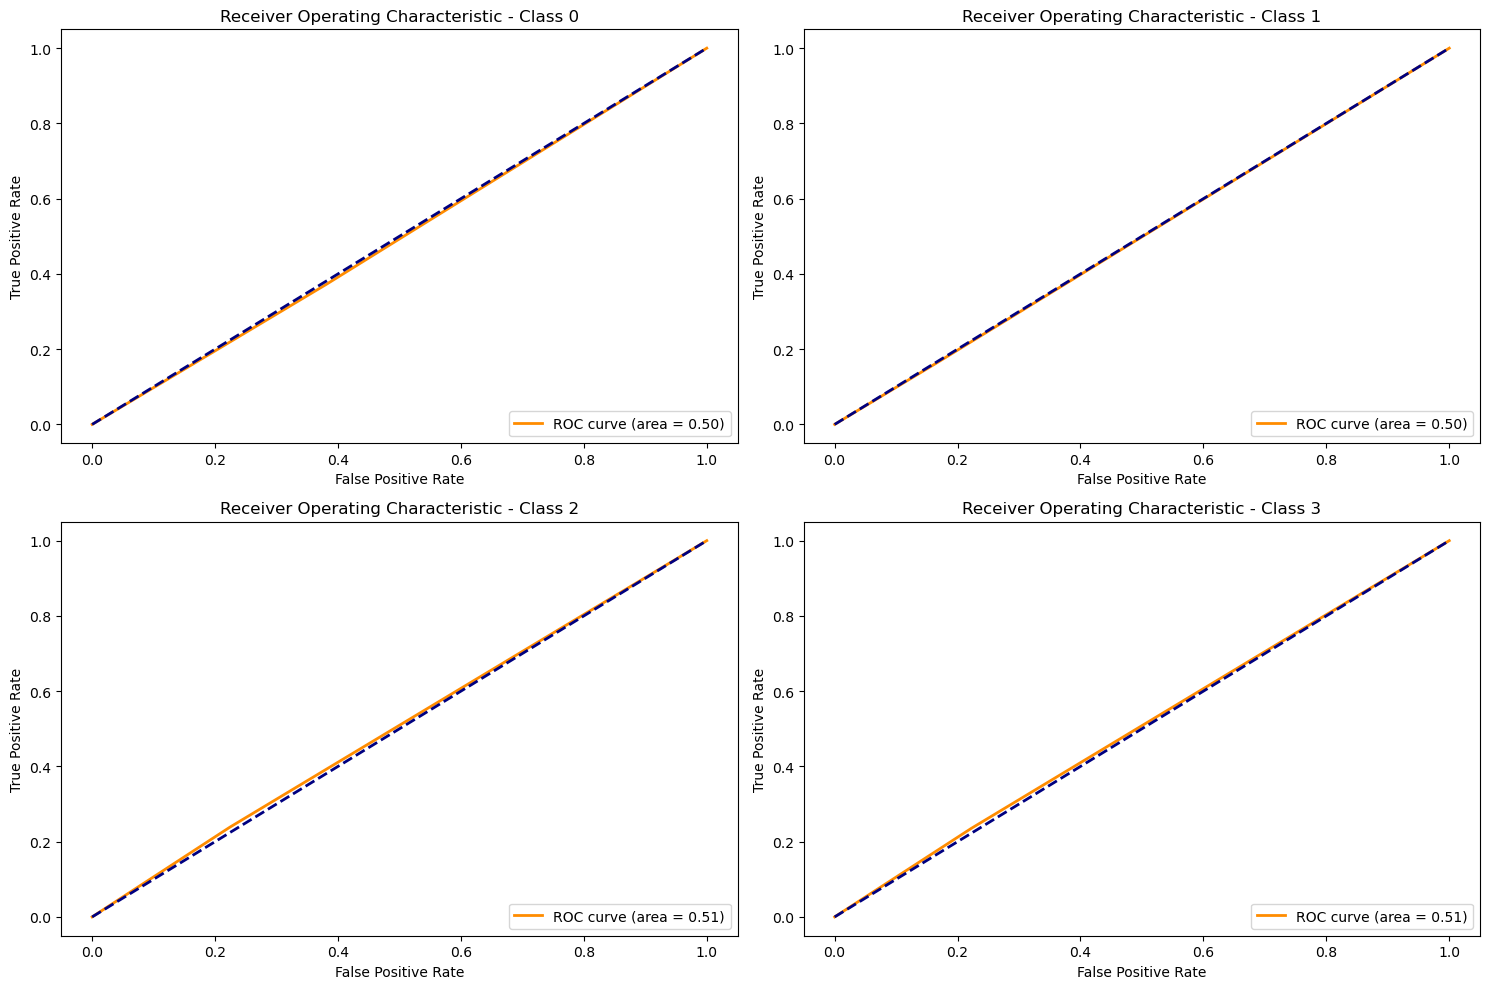

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming you have 4 classes
n_classes = 4

# Convert labels to one-hot encoding
y_true_one_hot = label_binarize(y_true_int, classes=range(n_classes))
y_pred_one_hot = label_binarize(y_pred_int, classes=range(n_classes))

# Initialize the plot
plt.figure(figsize=(15, 10))

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Create a subplot for each class
    plt.subplot(2, 2, i + 1)
    
    # Plot ROC curve for the current class
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Class {}'.format(i))
    plt.legend(loc="lower right")

# Adjust layout
plt.tight_layout()
plt.show()


In [1]:
pip install nibabel matplotlib


Note: you may need to restart the kernel to use updated packages.





9406464/9406464 [==============================] - 9s 1us/step

Found 33984 images belonging to 4 classes.
Found 11445 images belonging to 4 classes.
Epoch 1/25


22/22 [==============================] - 7s 174ms/step - loss: 1.5991 - accuracy: 0.3896 - val_loss: 1.4124 - val_accuracy: 0.3571
Epoch 2/25
22/22 [==============================] - 3s 132ms/step - loss: 1.6042 - accuracy: 0.2987 - val_loss: 1.2066 - val_accuracy: 0.3714
Epoch 3/25
22/22 [==============================] - 3s 148ms/step - loss: 1.3688 - accuracy: 0.3182 - val_loss: 1.3462 - val_accuracy: 0.3571
Epoch 4/25
22/22 [==============================] - 3s 133ms/step - loss: 1.3241 - accuracy: 0.2922 - val_loss: 1.3353 - val_accuracy: 0.3286
Epoch 5/25
22/22 [==============================] - 3s 132ms/step - loss: 1.3317 - accuracy: 0.3247 - val_loss: 1.2193 - val_accuracy: 0.4714
Epoch 6/25
22/22 [==============================] - 3s 134ms/step - loss: 1.2202 - accuracy: 0.4221 - val_loss: 1.3697 - val_accuracy: 

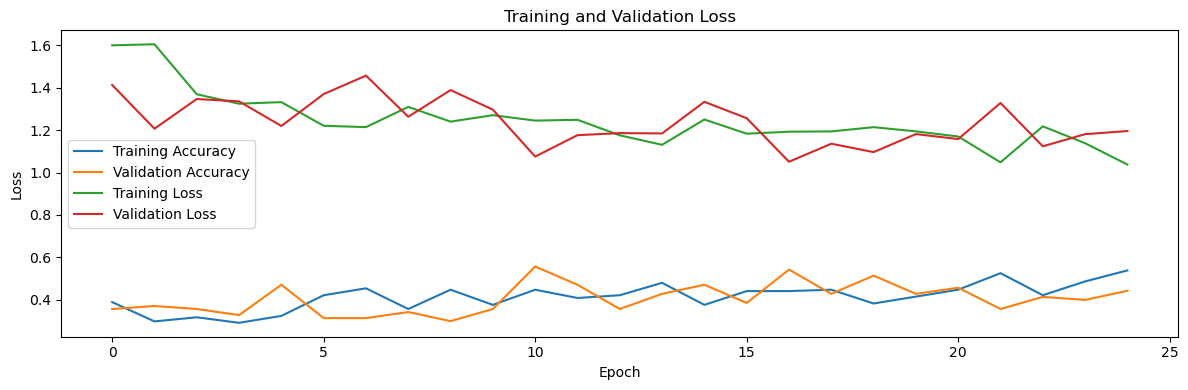

10/10 [==============================] - 1s 70ms/step - loss: 1.2144 - accuracy: 0.4429
Test Loss: 1.2143683433532715
Test Accuracy: 0.44285714626312256
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.06      0.09      2646
           1       0.17      0.07      0.09      2120
           2       0.33      0.87      0.48      3804
           3       0.27      0.00      0.00      2875

    accuracy                           0.31     11445
   macro avg       0.26      0.25      0.17     11445
weighted avg       0.27      0.31      0.20     11445



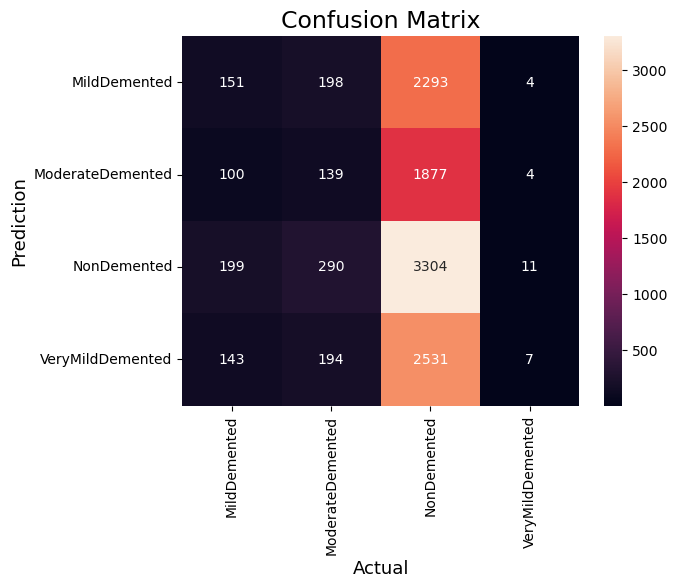

AUC-ROC Class 0: 0.5034171451662075
AUC-ROC Class 1: 0.4962146542566645
AUC-ROC Class 2: 0.4957899790974888
AUC-ROC Class 3: 0.5001088732180001


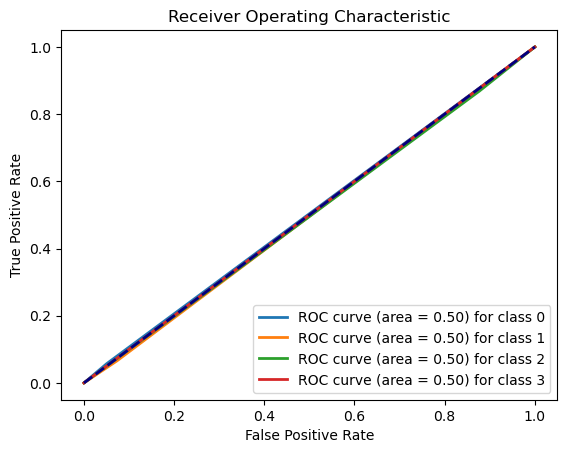

In [1]:
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Model Definition
model = Sequential()

# Use MobileNetV2 as base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3), pooling='avg')

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add the base model to the sequential model
model.add(base_model)

# Add your dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('D:\\FMRI Images\\AugmentedAlzheimerDataset',
                                                 target_size=(128, 128),
                                                 batch_size=7,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(r'D:\\FMRI Images\\test model\\AugmentedAlzheimerDataset',
                                            target_size=(128, 128),
                                            batch_size=7,
                                            class_mode='categorical')

history = model.fit(training_set,
                    steps_per_epoch=22,
                    epochs=25,
                    validation_data=test_set,
                    validation_steps=10)

# Visualizing Training Results
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy values
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Additional Metrics
test_metrics = model.evaluate(test_set, steps=10)
print(f'Test Loss: {test_metrics[0]}')
print(f'Test Accuracy: {test_metrics[1]}')

# Model Predictions
y_true = test_set.classes
y_pred = model.predict(test_set, steps=len(test_set), verbose=0)

# Convert one-hot encoded labels to integers
y_true_int = y_true
y_pred_int = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true_int, y_pred_int))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_int, y_pred_int)
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'],
            yticklabels=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

# One-hot encoding
y_true_one_hot = label_binarize(y_true_int, classes=[0, 1, 2, 3])
y_pred_one_hot = label_binarize(y_pred_int, classes=[0, 1, 2, 3])

# ROC-AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print AUC-ROC for each class
for i in range(4):
    print(f"AUC-ROC Class {i}: {roc_auc[i]}")

# Plot ROC curve
plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Found 33984 images belonging to 4 classes.
Found 11445 images belonging to 4 classes.
Epoch 1/25
22/22 [==============================] - 64s 2s/step - loss: 1.6085 - accuracy: 0.3523 - val_loss: 4.4211 - val_accuracy: 0.2594
Epoch 2/25
22/22 [==============================] - 34s 2s/step - loss: 1.1351 - accuracy: 0.4730 - val_loss: 4.0756 - val_accuracy: 0.2531
Epoch 3/25
22/22 [==============================] - 34s 2s/step - loss: 0.9619 - accuracy: 0.5284 - val_loss: 2.8099 - val_accuracy: 0.4406
Epoch 4/25
22/22 [==============================] - 34s 2s/step - loss: 0.9138 - accuracy: 0.5852 - val_loss: 7.6311 - val_accuracy: 0.3344
Epoch 5/25
22/22 [==============================] - 34s 2s/step - loss: 0.8850 - accuracy: 0.6065 - val_loss: 3.9843 - val_accuracy: 0.5000
Epoch 6/25
22/22 [==============================] - 33s 2s/step - loss: 0.8647 - accuracy: 0.5866 - val_loss: 2.9198 - val_accuracy: 0.4375
Epoch 7/25
22/22 [==============================] - 33s 2s/step - loss: 0.

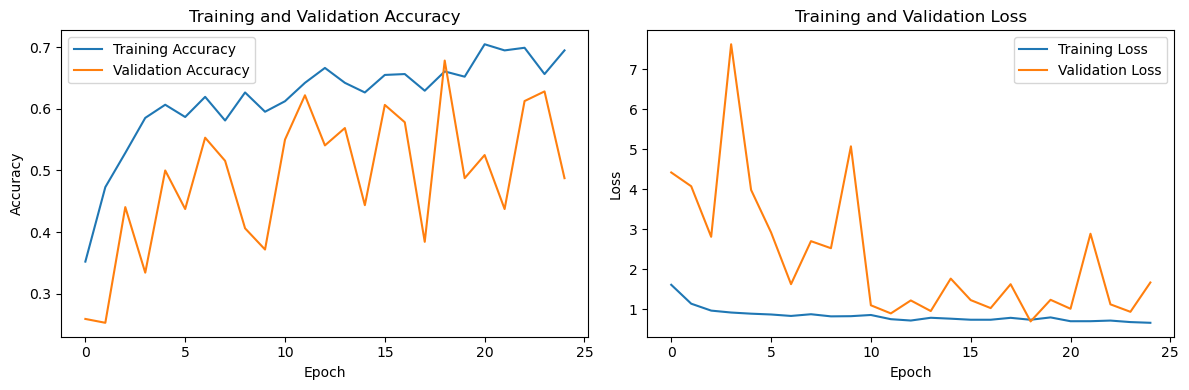

10/10 [==============================] - 4s 392ms/step - loss: 1.5972 - accuracy: 0.4875
Test Loss: 1.5971918106079102
Test Accuracy: 0.48750001192092896
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.39      0.29      2646
           1       0.18      0.44      0.26      2120
           2       0.31      0.14      0.19      3804
           3       0.22      0.02      0.03      2875

    accuracy                           0.22     11445
   macro avg       0.24      0.25      0.19     11445
weighted avg       0.25      0.22      0.19     11445



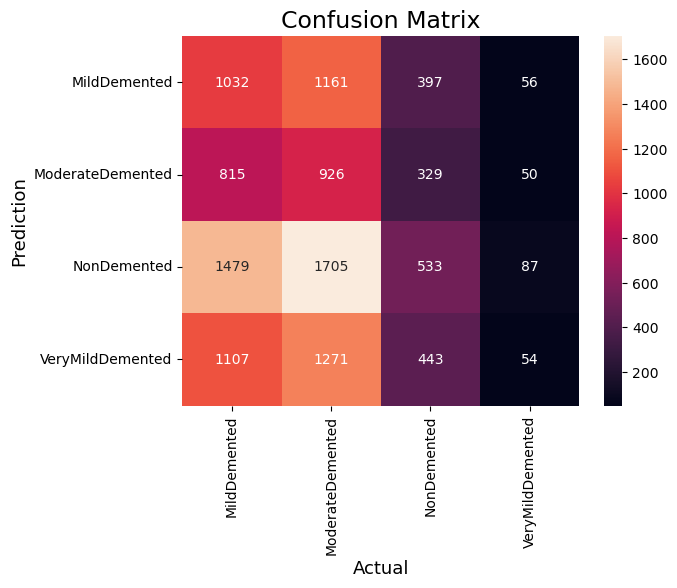

NameError: name 'label_binarize' is not defined

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.applications import DenseNet121

# Model Definition
model = Sequential()

base_model = DenseNet121(include_top=False, input_shape=(128, 128, 3), pooling='avg')
model.add(base_model)

model.add(Dense(128, activation='relu'))  # Add a dense layer
model.add(Dropout(0.3))  # Add dropout for regularization
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'D:\\FMRI Images\\AugmentedAlzheimerDataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    r'D:\\FMRI Images\\test model\\AugmentedAlzheimerDataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

history = model.fit(
    training_set,
    steps_per_epoch=22,
    epochs=25,
    validation_data=test_set,
    validation_steps=10
)

# Visualizing Training Results
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_metrics = model.evaluate(test_set, steps=10)
print(f'Test Loss: {test_metrics[0]}')
print(f'Test Accuracy: {test_metrics[1]}')

# Model Predictions
y_true = test_set.classes
y_pred = model.predict(test_set, steps=len(test_set), verbose=0)

# Convert one-hot encoded labels to integers
y_true_int = y_true
y_pred_int = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true_int, y_pred_int))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_int, y_pred_int)
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'],
            yticklabels=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

# ROC-AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# One-hot encoding
y_true_one_hot = label_binarize(y_true_int, classes=[0, 1, 2, 3])
y_pred_one_hot = label_binarize(y_pred_int, classes=[0, 1, 2, 3])

# Compute ROC curve and ROC area for each class
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print AUC-ROC for each class
for i in range(4):
    print(f"AUC-ROC Class {i}: {roc_auc[i]}")

# Plot ROC curve
plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam

# Model Definition
model = Sequential()

# Switching to InceptionV3
base_model = InceptionV3(include_top=False, input_shape=(128, 128, 3), pooling='avg')
model.add(base_model)

model.add(Dense(4, activation='softmax'))  # Assuming 4 classes (MildDemented, ModerateDemented, NonDemented, VeryMildDemented)

# Using a lower learning rate for fine-tuning
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('D:\\FMRI Images\\AugmentedAlzheimerDataset',
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(r'D:\test model\AugmentedAlzheimerDataset',
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='categorical')

# Increasing the number of epochs and steps_per_epoch
history = model.fit(training_set,
                    steps_per_epoch=22,
                    epochs=25,
                    validation_data=test_set,
                    validation_steps=len(test_set))

# Visualizing Training Results
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Additional Metrics
# Evaluate the model on the test set
test_metrics = model.evaluate(test_set, steps=len(test_set))
print(f'Test Loss: {test_metrics[0]}')
print(f'Test Accuracy: {test_metrics[1]}')

# Model Predictions
# Predictions on the test set
y_true = test_set.classes
y_pred = model.predict(test_set, steps=len(test_set), verbose=0)

# Convert one-hot encoded labels to integers
y_true_int = y_true
y_pred_int = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true_int, y_pred_int))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_int, y_pred_int)
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'], yticklabels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

# ROC-AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# One-hot encoding
y_true_one_hot = label_binarize(y_true_int, classes=[0, 1, 2, 3])
y_pred_one_hot = label_binarize(y_pred_int, classes=[0, 1, 2, 3])

# Compute ROC curve and ROC area for each class
for i in range(4):  # assuming you have 4 classes
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print AUC-ROC for each class
for i in range(4):
    print(f"AUC-ROC Class {i}: {roc_auc[i]}")

# Plot ROC curve
plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Found 33984 images belonging to 4 classes.
Found 281 images belonging to 4 classes.
Epoch 1/25
22/22 [==============================] - ETA: 0s - loss: 1.6531 - accuracy: 0.2614

KeyboardInterrupt: 

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam

# Model Definition
model = Sequential()

base_model = DenseNet121(include_top=False, input_shape=(128, 128, 3), pooling='avg')
model.add(base_model)
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

# Use a lower learning rate for fine-tuning
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation for both training and test sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('D:\\train model\\AugmentedAlzheimerDataset',
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('D:\\test model\\AugmentedAlzheimerDataset',
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='categorical')

# Adjust the steps_per_epoch and validation_steps based on your dataset size
history = model.fit(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=25,
                    validation_data=test_set,
                    validation_steps=len(test_set))

# Visualizing Training Results
# ... (rest of your code remains the same)


Found 624 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Epoch 1/25
20/20 [==============================] - 56s 1s/step - loss: 1.6811 - accuracy: 0.3894 - val_loss: 9.3822 - val_accuracy: 0.2899
Epoch 2/25
20/20 [==============================] - 26s 1s/step - loss: 0.9967 - accuracy: 0.5897 - val_loss: 1.9724 - val_accuracy: 0.5621
Epoch 3/25
20/20 [==============================] - 26s 1s/step - loss: 0.8184 - accuracy: 0.6266 - val_loss: 17.8616 - val_accuracy: 0.2899
Epoch 4/25
20/20 [==============================] - 26s 1s/step - loss: 0.6340 - accuracy: 0.7019 - val_loss: 7.7032 - val_accuracy: 0.4734
Epoch 5/25
20/20 [==============================] - 27s 1s/step - loss: 0.5975 - accuracy: 0.7099 - val_loss: 1.7247 - val_accuracy: 0.6686
Epoch 6/25
20/20 [==============================] - 27s 1s/step - loss: 0.5133 - accuracy: 0.7804 - val_loss: 1.4380 - val_accuracy: 0.5680
Epoch 7/25
20/20 [==============================] - 27s 1s/step - loss: 0.521

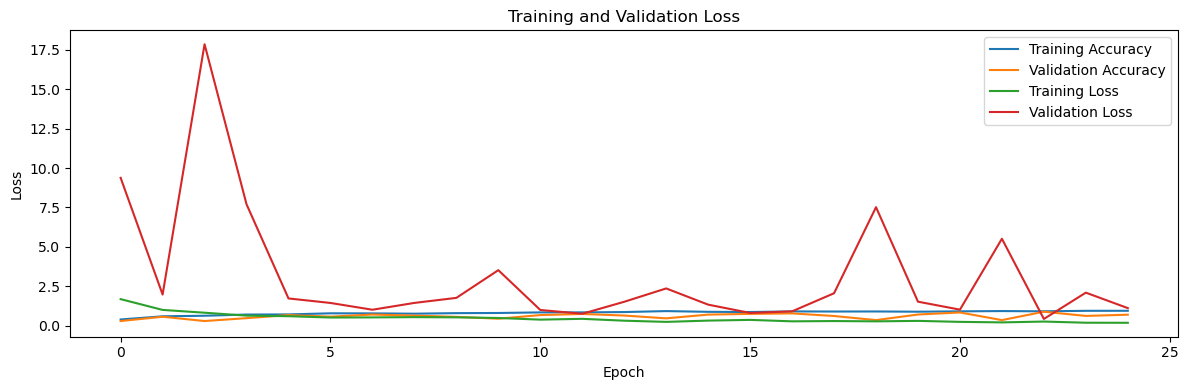

 6/10 [=================>............] - ETA: 1s - loss: 1.1107 - accuracy: 0.6923WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10 batches). You may need to use the repeat() function when building your dataset.


10/10 [==============================] - 3s 229ms/step - loss: 1.1107 - accuracy: 0.6923
Test Loss: 1.1107439994812012
Test Accuracy: 0.692307710647583
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.52      0.28        29
           1       0.20      0.12      0.15        49
           2       0.28      0.22      0.24        51
           3       0.24      0.12      0.16        40

    accuracy                           0.22       169
   macro avg       0.23      0.25      0.21       169
weighted avg       0.23      0.22      0.20       169



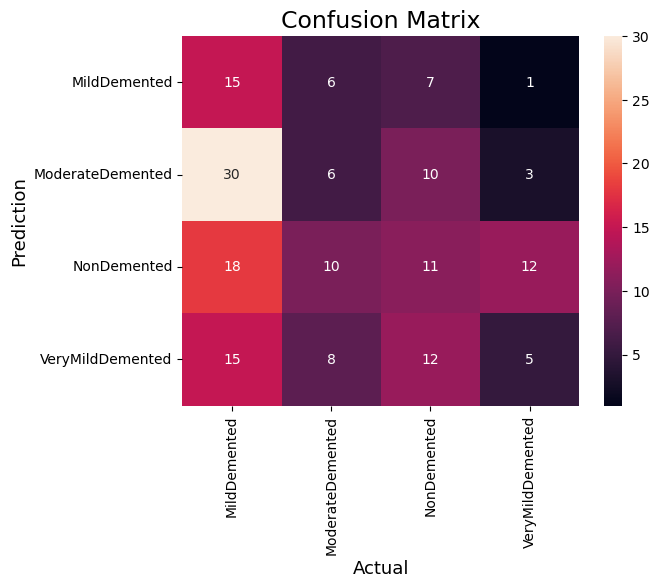

AUC-ROC Class 0: 0.5336206896551724
AUC-ROC Class 1: 0.46122448979591835
AUC-ROC Class 2: 0.4849617813226986
AUC-ROC Class 3: 0.500484496124031


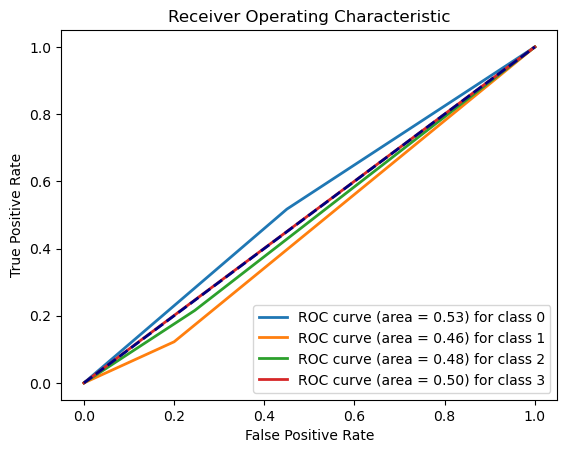

In [5]:
# Cell 6: Visualizing Training Results
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy values
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss values
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
# Cell 7: Additional Metrics
# Evaluate the model on the test set
test_metrics = model.evaluate(test_set, steps=10)
print(f'Test Loss: {test_metrics[0]}')
print(f'Test Accuracy: {test_metrics[1]}')

# Cell 8: Model Predictions
# Predictions on test set
y_true = test_set.classes
y_pred = model.predict(test_set, steps=len(test_set), verbose=0)

# Convert one-hot encoded labels to integers
y_true_int = y_true
y_pred_int = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true_int, y_pred_int))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_int, y_pred_int)
sns.heatmap(conf_matrix,annot=True,fmt='g',xticklabels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'],yticklabels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

from sklearn.preprocessing import label_binarize
# One-hot encoding
y_true_one_hot = label_binarize(y_true_int, classes=[0, 1, 2, 3])
y_pred_one_hot = label_binarize(y_pred_int, classes=[0, 1, 2, 3])
# ROC-AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(4):  # assuming you have 4 classes
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print AUC-ROC for each class
for i in range(4):
    print(f"AUC-ROC Class {i}: {roc_auc[i]}")

# Plot ROC curve
plt.figure()
for i in range(4):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()




In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam

# Model Definition
model = Sequential()

base_model = DenseNet121(include_top=False, input_shape=(128, 128, 3), pooling='avg')
model.add(base_model)
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes

# Use a lower learning rate for fine-tuning
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation for both training and test sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('D:\\train mri\\Dataset',
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('D:\\test mri\\Dataset',
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='categorical')

# Adjust the steps_per_epoch and validation_steps based on your dataset size
history = model.fit(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=25,
                    validation_data=test_set,
                    validation_steps=len(test_set))

# Visualizing Training Results
# ... (rest of your code remains the same)


Found 6400 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.
Epoch 1/25



200/200 [==============================] - 397s 2s/step - loss: 0.9448 - accuracy: 0.5678 - val_loss: 6.2938 - val_accuracy: 0.5000
Epoch 2/25
200/200 [==============================] - 350s 2s/step - loss: 0.7924 - accuracy: 0.6373 - val_loss: 2.7283 - val_accuracy: 0.3636
Epoch 3/25
200/200 [==============================] - 345s 2s/step - loss: 0.7159 - accuracy: 0.6892 - val_loss: 7.3862 - val_accuracy: 0.5000
Epoch 4/25
200/200 [==============================] - 341s 2s/step - loss: 0.6359 - accuracy: 0.7286 - val_loss: 3.5704 - val_accuracy: 0.4355
Epoch 5/25
200/200 [==============================] - 323s 2s/step - loss: 0.5458 - accuracy: 0.7683 - val_loss: 4.9123 - val_accuracy: 0.1658
Epoch 6/25
200/200 [==============================] - 313s 2s/step - loss: 0.5047 - accuracy: 0.7920 - val_loss: 6.1504 - val_accuracy: 0.4727
Epoch 7/25
200/200 [==============================] - 313s 2s/step - loss: 0.4399 - accuracy: 0.8203 - val_loss: 1.0799 - val_accuracy: 0.6627
Epoch 8/25

KeyboardInterrupt: 